Customer Purchase Behavior Analysis for an Online Retail Store

An online retail company wants to:

Understand customer purchasing behavior

Identify top products and customer segments

Improve revenue through data-driven decisions

Note: All monetary values in this analysis are reported in British Pounds (GBP, £), as the dataset originates from a UK-based online retailer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("../data/raw/Online Retail.xlsx")

print("Data loaded successfully")
print("Shape:", df.shape)
df.head()

Data loaded successfully
Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# This code will show data quality issues.

df.isna().mean().sort_values(ascending=False)

CustomerID     0.249267
Description    0.002683
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

In [6]:
df.shape

(541909, 8)

In [8]:
# Remove cancelled invoices

df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
print("Shape after removing cancellations:", df.shape)

Shape after removing cancellations: (532621, 8)


Remove rows with missing CustomerID - Transactions without a CustomerID were excluded because they cannot be attributed to individual customers for behavioral analysis.

In [9]:
df = df.dropna(subset=["CustomerID"])
print("Shape after dropping missing CustomerID:", df.shape)

Shape after dropping missing CustomerID: (397924, 8)


In [10]:
# Handeling missing descriptions

df["Description"] = df["Description"].fillna("Unknown")

In [13]:
# Convert InvoiceDate to datetime

df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

# Create total transaction value 
df["TotalPrice"]= df["Quantity"] * df["UnitPrice"]

# Time based features

df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Weekday"] = df["InvoiceDate"].dt.day_name()


In [14]:
# Remove invalid price quantity rows - This ensures no zero-price items and no negative revenue  

df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
print("Final cleaned shape:", df.shape)

Final cleaned shape: (397884, 13)


In [15]:
df.isna().mean().sort_values(ascending=False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
TotalPrice     0.0
Year           0.0
Month          0.0
Day            0.0
Weekday        0.0
dtype: float64

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday


In [18]:
df.shape

(397884, 13)

In [19]:
# Revenue overview
df["TotalPrice"].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

In [24]:
# Monthly revenue 

monthly_revenue = (
    df.groupby(["Year","Month"]) ["TotalPrice"]
.sum()
.reset_index()
)

monthly_revenue.head()

,Year,Month,TotalPrice
0,2010,12,572713.890
1,2011,1,569445.040
2,2011,2,447137.350
3,2011,3,595500.760
4,2011,4,469200.361


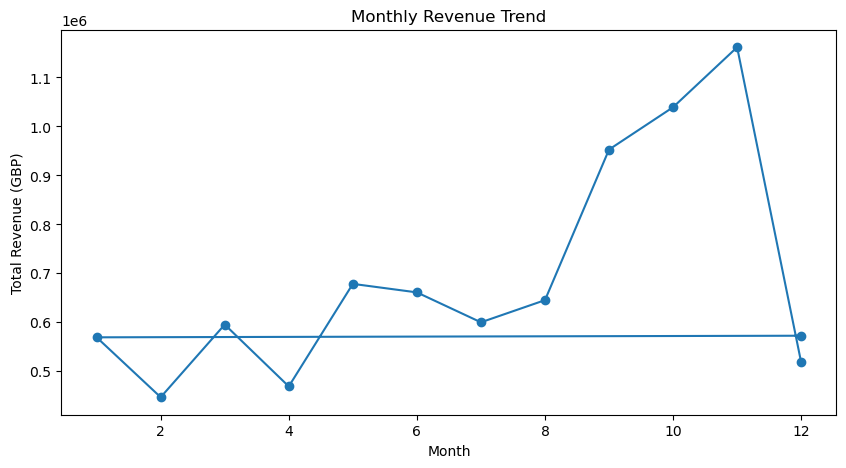

In [37]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["Month"], monthly_revenue["TotalPrice"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (GBP)")
plt.show()


Revenue shows noticeable variation accross months, suggesting potential seasonality in customer purchasing behavior  

In [28]:
# What should the business care about most?

top_products=(
    df.groupby("Description")["TotalPrice"]
.sum()
.sort_values(ascending=False)
.head(10)
)
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

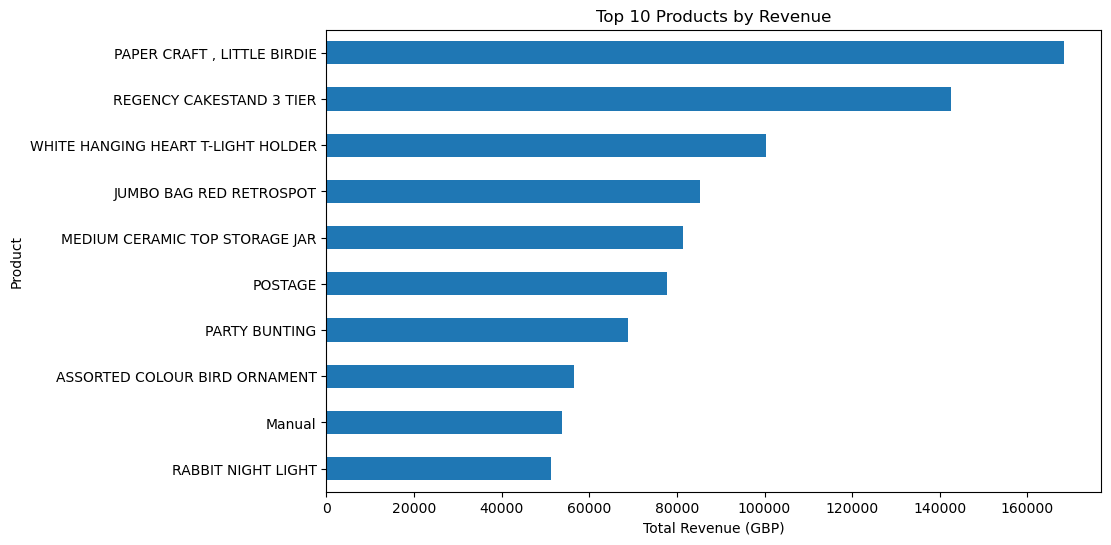

In [36]:
plt.figure(figsize=(10,6))
top_products.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue (GBP)")
plt.ylabel("Product")
plt.show()


A small number of products contribute disproportionately to total revenue, indicating opportunities for focused inventory and marketing strategies.

In [30]:
# Customer revenue 

customer_revenue = (
    df.groupby("CustomerID") ["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)
customer_revenue.head()

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: TotalPrice, dtype: float64

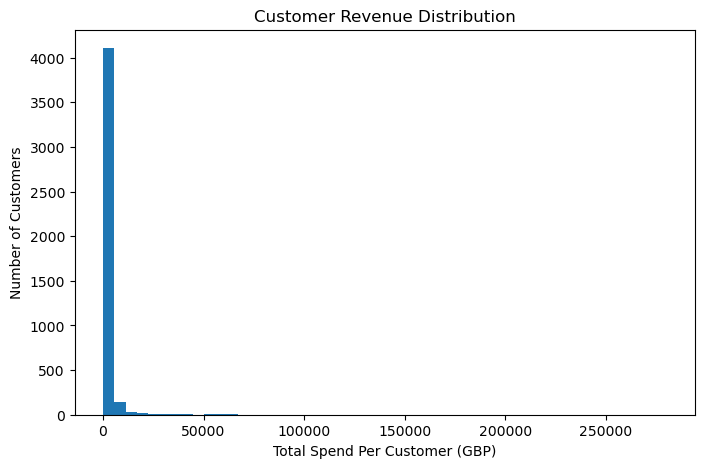

In [35]:
plt.figure(figsize=(8,5))
plt.hist(customer_revenue, bins=50)
plt.title("Customer Revenue Distribution")
plt.xlabel("Total Spend Per Customer (GBP)")
plt.ylabel("Number of Customers")
plt.show()

Most customers generate relatively low revenue, while a small subset of customers accounts for significantly higher spending.

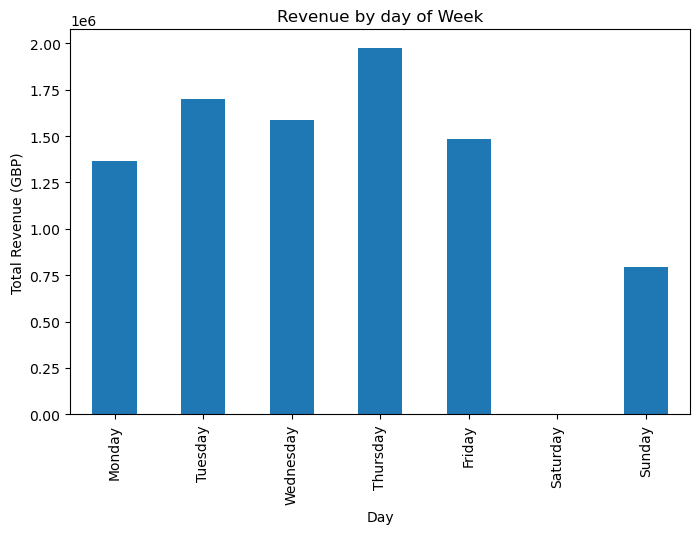

In [34]:
# Days of the week behavior

weekday_revenue = (
    df.groupby("Weekday") ["TotalPrice"]
    .sum()
    .reindex([
        "Monday","Tuesday","Wednesday", 
        "Thursday","Friday","Saturday","Sunday"
    ])
)
plt.figure(figsize=(8,5))
weekday_revenue.plot(kind="bar")
plt.title("Revenue by day of Week")
plt.xlabel("Day")
plt.ylabel("Total Revenue (GBP)")
plt.show()

Revenue varies by day of the week, suggesting potential opportunities for targeted promotions or staffing optimization.

Key Insights

Revenue shows seasonal variation across months, indicating that customer purchasing behavior is not evenly distributed throughout the year and may be influenced by seasonal demand.

A small subset of products accounts for a disproportionate share of total revenue, suggesting that business performance is highly dependent on a limited number of high-performing items.

Customer spending is highly skewed, with most customers contributing relatively low revenue while a small group of high-value customers drives a significant portion of sales.

Revenue varies by day of the week, which may reflect differences in customer shopping behavior or operational factors such as promotions or availability.

Recommendations

Prioritize inventory and marketing efforts around top-performing products, as these items have the greatest impact on overall revenue.

Develop targeted strategies for high-value customers, such as loyalty programs or personalized promotions, to retain and further increase their lifetime value.

Leverage seasonal revenue patterns by aligning promotions, inventory planning, and staffing with periods of higher demand.

Use day-of-week revenue patterns to optimize marketing campaigns and operational planning.

Limitations & Next Steps

This analysis is based on historical transaction data and does not include customer demographics or marketing campaign information.

Currency values were analyzed at face value and do not account for inflation or exchange rate changes.

Future analysis could include customer segmentation (e.g., RFM analysis), cohort analysis, or predictive modeling to better understand customer behavior over time.